In [31]:
#imports
import os
import gzip
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
#loading dataset
filename = "cnvcka.tsv"
dfile = pd.read_csv(filename, sep='\t')
dfile = dfile.dropna(subset=['#chrom'])

In [33]:
directory = 'data/data/annotated_cnvs_json'
dfs = []

for filename in os.listdir(directory)[:15]:
    if filename.endswith('.json.gz'):
        file_path = os.path.join(directory, filename)

        with gzip.open(file_path, 'rb') as f:
            file_content = f.read().decode('utf-8')

        data = json.loads(file_content)
        genes_df = pd.json_normalize(data, 'genes', sep='_')
        main_df = pd.json_normalize(data, sep='_')
        result_df = pd.concat([main_df, genes_df], axis=1)
        dfs.append(result_df)

df = pd.concat(dfs, ignore_index=True)
df = df.dropna(subset=['chrom'])

In [34]:
df.columns

Index(['chrom', 'start', 'end', 'cnv_type', 'genes',
       'Pathway(ConsensusPathDB)_imputed_unscaled',
       'Pathway(ConsensusPathDB)_imputed_scaled',
       'Pathway(ConsensusPathDB)_unimputed_unscaled',
       'Pathway(ConsensusPathDB)_raw', 'Function_description_imputed_unscaled',
       ...
       'Essential_gene_gene-trap_N_unimputed_unscaled',
       'Essential_gene_gene-trap_N_raw',
       'Gene_indispensability_pred_E_imputed_unscaled',
       'Gene_indispensability_pred_E_imputed_scaled',
       'Gene_indispensability_pred_E_unimputed_unscaled',
       'Gene_indispensability_pred_E_raw',
       'Gene_indispensability_pred_N_imputed_unscaled',
       'Gene_indispensability_pred_N_imputed_scaled',
       'Gene_indispensability_pred_N_unimputed_unscaled',
       'Gene_indispensability_pred_N_raw'],
      dtype='object', length=377)

In [35]:
merged_df = pd.merge(dfile, df, left_on=['#chrom', 'chromStart', 'chromEnd'], right_on=['chrom', 'start', 'end'], how='outer')

merged_df

,#chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,Essential_gene_gene-trap_N_unimputed_unscaled,Essential_gene_gene-trap_N_raw,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_E_raw,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled,Gene_indispensability_pred_N_raw
0,chr1,16301.0,166909.0,nssv584580,0.0,.,16301.0,166909.0,"77,184,255",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,91323.0,128277.0,nssv1609094,0.0,.,91323.0,128277.0,"255,98,119",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,629024.0,8537745.0,nssv577125,1.0,.,629024.0,8537745.0,"153,0,0",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,629043.0,7008678.0,nssv577128,1.0,.,629043.0,7008678.0,"153,0,0",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,629043.0,3346226.0,nssv577127,1.0,.,629043.0,3346226.0,"153,0,0",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
21398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
21399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
21400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E


In [36]:
merged_df.columns

Index(['#chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand',
       'thickStart', 'thickEnd', 'reserved', 'blockCount',
       ...
       'Essential_gene_gene-trap_N_unimputed_unscaled',
       'Essential_gene_gene-trap_N_raw',
       'Gene_indispensability_pred_E_imputed_unscaled',
       'Gene_indispensability_pred_E_imputed_scaled',
       'Gene_indispensability_pred_E_unimputed_unscaled',
       'Gene_indispensability_pred_E_raw',
       'Gene_indispensability_pred_N_imputed_unscaled',
       'Gene_indispensability_pred_N_imputed_scaled',
       'Gene_indispensability_pred_N_unimputed_unscaled',
       'Gene_indispensability_pred_N_raw'],
      dtype='object', length=418)

In [37]:
#final_df = merged_df[[ 'chrom', 'start', 'end', 'HIPred_score_imputed_unscaled', 'ExAC_pRec_imputed_unscaled']]
#final_df = final_df.dropna()
#selected_df = final_df[['HIPred_score_imputed_unscaled', 'ExAC_pRec_imputed_unscaled']]

#selected_df.hist(figsize=(10, 6), bins=20, alpha=0.7)
#plt.suptitle('Distribution of HIPred_score and ExAC_pRec')
#plt.xlabel('Values')
#plt.ylabel('Frequency')
#plt.show()


In [38]:
merged_df.corr()

C:\Users\janos\AppData\Local\Temp\ipykernel_20884\4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,chromStart,chromEnd,score,thickStart,thickEnd,blockCount,blockSizes,chromStarts,_hgvsProt,numSubmit,...,Essential_gene_gene-trap_K_unimputed_unscaled,Essential_gene_gene-trap_N_imputed_unscaled,Essential_gene_gene-trap_N_imputed_scaled,Essential_gene_gene-trap_N_unimputed_unscaled,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled
chromStart,1.000000,0.984501,-0.008806,1.000000,0.984501,NaN,-0.068369,NaN,NaN,-0.005791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chromEnd,0.984501,1.000000,-0.017809,0.984501,1.000000,NaN,0.107660,NaN,NaN,-0.006412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,-0.008806,-0.017809,1.000000,-0.008806,-0.017809,NaN,-0.051384,NaN,NaN,0.200153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thickStart,1.000000,0.984501,-0.008806,1.000000,0.984501,NaN,-0.068369,NaN,NaN,-0.005791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thickEnd,0.984501,1.000000,-0.017809,0.984501,1.000000,NaN,0.107660,NaN,NaN,-0.006412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene_indispensability_pred_E_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,-1.0
Gene_indispensability_pred_E_unimputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,-1.0
Gene_indispensability_pred_N_imputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,1.0,1.0,1.0
Gene_indispensability_pred_N_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,1.0,1.0,1.0


In [39]:
# Drop the 'start' and 'end' columns
df_without_start_end = df.drop(['start', 'end'], axis=1)

# Compute the correlation matrix
correlation_matrix = df_without_start_end.corr()
correlation_matrix

C:\Users\janos\AppData\Local\Temp\ipykernel_20884\3662285133.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_start_end.corr()


,Pathway(ConsensusPathDB)_imputed_unscaled,Pathway(ConsensusPathDB)_imputed_scaled,Pathway(ConsensusPathDB)_unimputed_unscaled,Function_description_imputed_unscaled,Function_description_imputed_scaled,Function_description_unimputed_unscaled,Disease_description_imputed_unscaled,Disease_description_imputed_scaled,Disease_description_unimputed_unscaled,MIM_disease_imputed_unscaled,...,Essential_gene_gene-trap_K_unimputed_unscaled,Essential_gene_gene-trap_N_imputed_unscaled,Essential_gene_gene-trap_N_imputed_scaled,Essential_gene_gene-trap_N_unimputed_unscaled,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled
Pathway(ConsensusPathDB)_imputed_unscaled,1.0,1.0,1.0,NaN,NaN,NaN,0.236525,0.236525,0.236525,0.196116,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,-1.0
Pathway(ConsensusPathDB)_imputed_scaled,1.0,1.0,1.0,NaN,NaN,NaN,0.236525,0.236525,0.236525,0.196116,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,-1.0
Pathway(ConsensusPathDB)_unimputed_unscaled,1.0,1.0,1.0,NaN,NaN,NaN,0.236525,0.236525,0.236525,0.196116,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,-1.0
Function_description_imputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Function_description_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene_indispensability_pred_E_imputed_scaled,1.0,1.0,1.0,NaN,NaN,NaN,0.236525,0.236525,0.236525,0.196116,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,-1.0
Gene_indispensability_pred_E_unimputed_unscaled,1.0,1.0,1.0,NaN,NaN,NaN,0.236525,0.236525,0.236525,0.196116,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,-1.0
Gene_indispensability_pred_N_imputed_unscaled,-1.0,-1.0,-1.0,NaN,NaN,NaN,-0.236525,-0.236525,-0.236525,-0.196116,...,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,1.0,1.0,1.0
Gene_indispensability_pred_N_imputed_scaled,-1.0,-1.0,-1.0,NaN,NaN,NaN,-0.236525,-0.236525,-0.236525,-0.196116,...,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,1.0,1.0,1.0


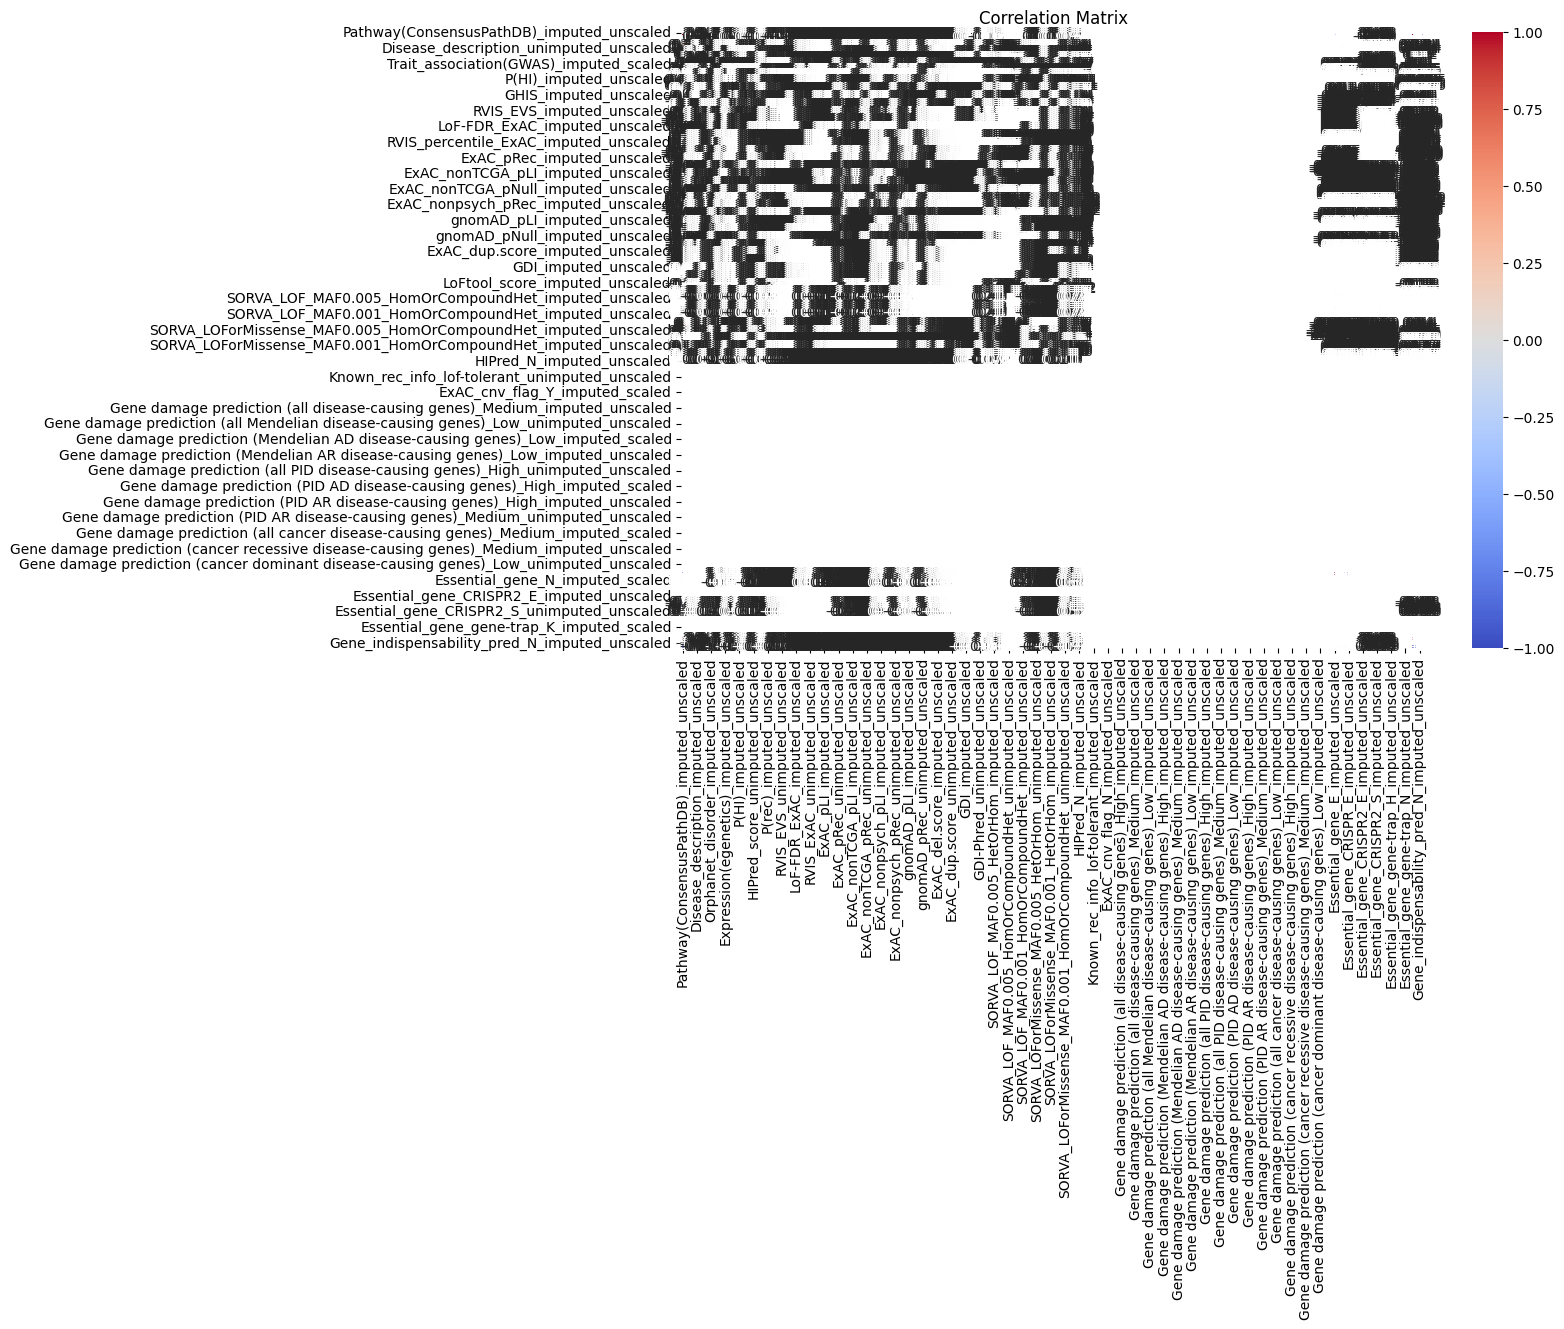

In [40]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [43]:
# Filter the correlation matrix to find significant correlations
correlation_threshold = 0.5
selected_correlations = correlation_matrix[
    (correlation_matrix.abs() >= correlation_threshold) & (correlation_matrix.abs() != 1.0)
]
selected_correlations

,Pathway(ConsensusPathDB)_imputed_unscaled,Pathway(ConsensusPathDB)_imputed_scaled,Pathway(ConsensusPathDB)_unimputed_unscaled,Function_description_imputed_unscaled,Function_description_imputed_scaled,Function_description_unimputed_unscaled,Disease_description_imputed_unscaled,Disease_description_imputed_scaled,Disease_description_unimputed_unscaled,MIM_disease_imputed_unscaled,...,Essential_gene_gene-trap_K_unimputed_unscaled,Essential_gene_gene-trap_N_imputed_unscaled,Essential_gene_gene-trap_N_imputed_scaled,Essential_gene_gene-trap_N_unimputed_unscaled,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled
Pathway(ConsensusPathDB)_imputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
Pathway(ConsensusPathDB)_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
Pathway(ConsensusPathDB)_unimputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
Function_description_imputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Function_description_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene_indispensability_pred_E_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
Gene_indispensability_pred_E_unimputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
Gene_indispensability_pred_N_imputed_unscaled,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN
Gene_indispensability_pred_N_imputed_scaled,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN


In [42]:
# Extract the names of correlated features
correlated_pairs = selected_correlations.stack().reset_index()
correlated_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
# Remove duplicate pairs and sort
correlated_pairs['Pairs'] = correlated_pairs.apply(
    lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1
)
correlated_pairs = correlated_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs').reset_index(drop=True)

# Display the correlated features
print("Correlated feature pairs with a correlation coefficient of at least 0.5 (or -0.5):")
correlated_pairs

Correlated feature pairs with a correlation coefficient of at least 0.5 (or -0.5):


,Feature 1,Feature 2,Correlation
0,Pathway(ConsensusPathDB)_imputed_unscaled,Interactions(ConsensusPathDB)_imputed_unscaled,0.563323
1,Pathway(ConsensusPathDB)_imputed_unscaled,Interactions(ConsensusPathDB)_imputed_scaled,0.563323
2,Pathway(ConsensusPathDB)_imputed_unscaled,Interactions(ConsensusPathDB)_unimputed_unscaled,0.563323
3,Pathway(ConsensusPathDB)_imputed_unscaled,HIPred_score_imputed_unscaled,0.665515
4,Pathway(ConsensusPathDB)_imputed_unscaled,HIPred_score_imputed_scaled,0.665515
...,...,...,...
7417,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_N_imputed_scaled,-1.000000
7418,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled,-1.000000
7419,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_unscaled,-1.000000
7420,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,-1.000000


In [44]:
# Linear Regression and Decision Tree for Correlated Pairs
results = []
df_without_start_end = df_without_start_end.fillna(0)
for index, row in correlated_pairs.iterrows():
    feature1 = row['Feature 1']
    feature2 = row['Feature 2']
    
    # Prepare the data
    X = df_without_start_end[[feature1]]
    y = df_without_start_end[feature2]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Linear Regression
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, y_train)
    y_pred_linear = linear_regressor.predict(X_test)
    
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    
    # Decision Tree Regression
    tree_regressor = DecisionTreeRegressor(random_state=42)
    tree_regressor.fit(X_train, y_train)
    y_pred_tree = tree_regressor.predict(X_test)
    
    mse_tree = mean_squared_error(y_test, y_pred_tree)
    r2_tree = r2_score(y_test, y_pred_tree)
    
    # Save results
    results.append({
        'Feature 1': feature1,
        'Feature 2': feature2,
        'MSE Linear': mse_linear,
        'R2 Linear': r2_linear,
        'MSE Tree': mse_tree,
        'R2 Tree': r2_tree
    })


In [45]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df

,Feature 1,Feature 2,MSE Linear,R2 Linear,MSE Tree,R2 Tree
0,Pathway(ConsensusPathDB)_imputed_unscaled,Interactions(ConsensusPathDB)_imputed_unscaled,1.605244e-03,0.567307,0.001605,0.567307
1,Pathway(ConsensusPathDB)_imputed_unscaled,Interactions(ConsensusPathDB)_imputed_scaled,1.605244e-03,0.567307,0.001605,0.567307
2,Pathway(ConsensusPathDB)_imputed_unscaled,Interactions(ConsensusPathDB)_unimputed_unscaled,1.605244e-03,0.567307,0.001605,0.567307
3,Pathway(ConsensusPathDB)_imputed_unscaled,HIPred_score_imputed_unscaled,1.237628e-05,0.929906,0.000012,0.929906
4,Pathway(ConsensusPathDB)_imputed_unscaled,HIPred_score_imputed_scaled,2.325052e-04,0.929906,0.000233,0.929906
...,...,...,...,...,...,...
7417,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_N_imputed_scaled,6.162976e-32,1.000000,0.000000,1.000000
7418,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled,6.162976e-32,1.000000,0.000000,1.000000
7419,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_unscaled,6.162976e-32,1.000000,0.000000,1.000000
7420,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,6.162976e-32,1.000000,0.000000,1.000000


In [50]:

# Save results to Excel file
results_df.to_excel('result.xlsx', index=False)
print("Results have been saved to result.xlsx")

Results have been saved to result.xlsx
